# Project 3 : Analyze A/B Test Results

### by : Nouf AlSubaie 


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# import neccessairly librarires
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read the data set 
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Find the number of rows in the data set 
rows = df.shape[0]
print('The Number of rows is',rows)

The Number of rows is 294478


c. The number of unique users in the dataset.

In [4]:
# Find the number of unique users in the data set 
unique = df.user_id.nunique()
print('The Number of unique users is',unique)

The Number of unique users is 290584


d. The proportion of users converted.

In [5]:
# Find the proportion of users converted 
p=(df['converted']).mean()
print('The proportion of users converted',p)

The proportion of users converted 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#the number of times the new_page and the treatment dont line up occur in two cases 
#which are when the new_page is lined up with the control and when the teatment is lined up with old page 

mismatch1 = df.query('landing_page == "new_page"  &  group == "control" ')

mismatch2 =df.query('landing_page == "old_page"  &  group == "treatment" ')

#calculate thenumber of time new_page and treatment don't line up
print("The number of times the new_page and treatment don't line up",len(mismatch1 ) + len(mismatch2))

The number of times the new_page and treatment don't line up 3893


f. Do any of the rows have missing values?

In [7]:
# check for null values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

 There is **No** Missing values 

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# create a new data frame where it doesnt contain the 3893 rows where the new_page
# and the treatment didn't line up
df1 = df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index)
df2 = df1.drop(df.query("group == 'control' and landing_page == 'new_page'").index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#calculate the number of unique users in df2
unique2 = df2.user_id.nunique()
print('The Number of unique users is',unique2)

The Number of unique users is 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# check for duplication in df2
duplicated = df2.user_id.duplicated()
df2.user_id[duplicated]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
# The row information for the repeat user_id
df2[duplicated]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# number of  rows before dropping 
df2.shape[0]

290585

In [14]:
# Drop one of the rows that belongs to the repeated user_id 
df2 = df2.drop_duplicates(subset="user_id")
# Double check whether the drop is implemented successfully 
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#Calculate the probability of an individual converting regardless of the page they receive
p2 = df2['converted'].mean()
print("The probability of an individual converting regardless of the page they receive is",p2)

The probability of an individual converting regardless of the page they receive is 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# Calculate the probability an indivisual has converted given that he is in control group 
p3 = df2.query('group == "control"')['converted'].mean()
print("The probability an indivisual has converted given that he is in control group is ", p3)

The probability an indivisual has converted given that he is in control group is  0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
## Calculate the probability an indivisual has converted given that he is in treatment group 
p4 = df2.query('group == "treatment"')['converted'].mean()
print("The probability an indivisual has converted given that he is in treatment group is ", p4)

The probability an indivisual has converted given that he is in treatment group is  0.11880806551510564


d. What is the probability that an individual received the new page?

In [18]:
# Calculate the probability that an individual received the new page
new_pages =df2.query('landing_page == "new_page"')
total = df2['landing_page']
prop = len(new_pages)/len(total)
print("the probability that an individual received the new page",prop)

the probability that an individual received the new page 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer :**
The entire population count is 290584 ,  approximatly 50% has recieved the new page and 50% has recieved the old one 

*Based on the given results illustrated above it was found that :* 
*  The propibablity of converting given that the indivisual was in control group is 0.1203

*  The propibablity of converting given that the indivisual was in treatment group is 0.1188

*  Thus , the old page has a higher converting rate with a very minimum difference 
 
*  The new page did not increase the conversion rate  


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**
>####  Null Hypothesis : 
The conversion rate for the old page is greater than or equal to the conversion rate for the new page

   **$p_{old}$** >= **$p_{new}$**

>#### Alternative Hypothesis : 
The conversion rate for the new page is grater than the conversion rate for the old page

   **$p_{new}$** > **$p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
# The description states that both p_new and p_old will have the same coverted rate regardless of the page  
p_new = df2["converted"].mean()
print("The conversion rate for the new page is ", p_new)

The conversion rate for the new page is  0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
# The description states that both p_new and p_old will have the same coverted rate regardless of the page  
p_old= df2["converted"].mean()
print("The conversion rate for the old page is ", p_old)

The conversion rate for the old page is  0.11959708724499628


c. What is $n_{new}$?

In [21]:
# Calculate the number of new pages 
n_new = len(df2.query('landing_page == "new_page"'))
print("The number of new pages is ", n_new)

The number of new pages is  145310


d. What is $n_{old}$?

In [22]:
# Calculate the number of old pages
n_old = len(df2.query('landing_page == "old_page"'))
print("The number of old pages is ", n_old)

The number of old pages is  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# simulate n_old transactions with a convert rate of p_new under the null
complement_p = 1-p_new
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new,complement_p])
new_page_converted.mean()

0.1210033721010254

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
 #simulate n_old transactions with a convert rate of p_old under the null
complement_p1 = 1-p_old
old_page_converted = np.random.choice([1, 0], size=n_new, p=[p_old,complement_p1])
old_page_converted.mean()

0.11990227788865185

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
# calculate the diff in means
diff = new_page_converted.mean() - old_page_converted.mean()
diff

0.0011010942123735462

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# simulate 10000 diffrences and store them in a numpy array
p_diffs = [] 
for _ in range (10000):
    new_page_converted = np.random.choice([1, 0], size=n_new,replace = True , p=[p_new,1-p_new])
    old_page_converted = np.random.choice([1, 0], size=n_new,replace = True , p=[p_old ,1-p_old])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

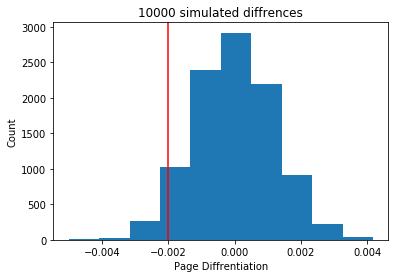

In [27]:
# plotting a histogram 
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.axvline(diff, color='r');
plt.xlabel('Page Diffrentiation')
plt.ylabel('Count')
plt.title('10000 simulated diffrences');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
observed_old = df.query('group == "control"')['converted']
observed_new = df.query('group == "treatment"')['converted']
observed_diff = observed_new.mean() - observed_old.mean() 

In [29]:
#calculate the proportion of p_diffs greater than the observed difference
print("The proportion when p_diffs are greater than the actual diff is ",(p_diffs > observed_diff).mean())

The proportion when p_diffs are greater than the actual diff is  0.8924


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer :**

89% is the proportion of p_diff when they are greater than the actual observed difference from the original data set. In scientific studies this values is called p-value. In this situation, the p-value is considered very high and its higher than error rate which is 0.05 this indicates that we fail to reject our null hypothesis which states "The conversion rate for the old page is greater than or equal to the conversion rate for the new page".In other words our null hypothesis is true and it even preform better with a minimal difference than the alternative hypthesis and there is no enough evidence to say otherwise

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = sum(df2.query('group == "control"')['converted'])
convert_new = sum(df2.query('group == "treatment"')['converted'])
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
(z_score, p_value)

(1.3109241984234394, 0.9050583127590245)

In [32]:
from scipy.stats import norm

# Assuming 95% of confidence interval p=1-alpha , p=1-0.05
print(norm.ppf(0.95))

1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**
* The z-score is 1.31 
* The p-value is 0.905 
* The critical value is 1.64

The z-score is less than the critical value which is 1.64 and the p-value is less than alpha (0.05). Hence , We cannot reject the null hypothesis.This matches with findings in part j&k.



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**

logisitic Regression , Since there is only 2 possible output - either converted/un-converted- which can be imterpreted to 0's and 1's . 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# create the intercept columns 
df2['intercept']=1
#Create dummy variable column
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
import statsmodels.api as sm
logit=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        18:26:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**

The p-value associated with ab_page is 0.19 and since it is greater than the alpha =0.05 we cannot reject the null hypothesis.Its different from the p-value used in part II due to the fact that in part II we performed a one-sided test,whereas here we preformed a two-sided test. 

>####  Null Hypothesis : 
 **$p_{old}$** = **$p_{new}$**

>#### Alternative Hypothesis : 
**$p_{new}$** != **$p_{old}$**




f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

It would be a good idea to consider other factors in our regression model since it can enhace the model and we can obtain more accurate results. 
As for the disadvantage,the model might become more complex and very large to estimate and predict

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [37]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [38]:
print(df_new.country.unique())

['UK' 'US' 'CA']


In [39]:
#create dummy variables with 'CA' as the baseline
df_new[['CA','UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [40]:
#Create intercept variable
df_new['intercept'] = 1

#Create Logit regression model for conveted and country, and us CA as baseline
Model_loc = sm.Logit(df_new['converted'], df_new[['intercept','UK','US']])
result2 = Model_loc.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        18:26:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [41]:
np.exp(result2.params)
# with returned values less than 1 ,
#it is often beneficial to obtain the Reciprocal

intercept    0.130350
UK           1.052027
US           1.041647
dtype: float64

In [42]:
# calculate the reciprocal
1/np.exp(result2.params)

intercept    7.671651
UK           0.950546
US           0.960018
dtype: float64

**Result** : 

Based on the results illustrated above we can conclude : 

* if an indivisual was located in the UK , he is 0.95 more likely to convert than if he was in CA holding all else constant . 
* if an indivisual was located in the US , he is 0.96 more likely to convert than if he was in CA holding all else constant. 

From the summary illustrated above , all variables have a p-value greater than 0.05 which indicates that none of them has a significant p-value. Hence, we can conclude that the country has no impact on the conversion rate.
    

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
# create the interaction variables 
df_new["UK_page"] = df_new["ab_page"]*df_new["UK"]
df_new["US_page"] = df_new["ab_page"]*df_new["US"]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,UK_page,US_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [44]:
#Create Logit regression model for conveted and country, and us CA as baseline
Model_loc = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','UK','US','UK_page','US_page']])
result3 = Model_loc .fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 17 Jun 2020   Pseudo R-squ.:               3.482e-05
Time:                        18:26:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_page        0.0783      0.057      1.378      0.168      -0.033       0.190
US_page        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

In [45]:
np.exp(result3.params)
# with returned values less than 1 ,
#it is often beneficial to obtain the Reciprocal

intercept    0.134794
ab_page      0.934776
UK           1.011854
US           1.017682
UK_page      1.081428
US_page      1.048001
dtype: float64

In [46]:
# Calculate the reciprocal
1/np.exp(result3.params)

intercept    7.418713
ab_page      1.069775
UK           0.988285
US           0.982625
UK_page      0.924703
US_page      0.954198
dtype: float64

**Result:**

All the variables have a p-value greater than 0.05, therofore none of them has a significant p-value. Hence, we fail to reject the null hypothesis.
Also , We can conclude that there is no evidience to proof that the interaction between the page and country will affect the conversion rate.

<a id='conclusions'></a>
## Conclusions
In conclusion, based on the propbibalities , A/B test and the logistic regression results we fail to reject our null hypithesis.
Also,we can conclude that  there is no enough evidence to say that the new page has a conversion rate higher than the old one.Hence , I don't recommend the company to implement the new page.



## References 
* StackOverFlow 
* Pandas 
* Numpy 
* Udacity 